# Filtro anti-hater per social network <br> Master in Data Science - Profession AI <br> Virginio Cocciaglia

Negli ultimi anni, la moderazione dei contenuti online è diventata una sfida cruciale per molte piattaforme, che si trovano ad affrontare un volume crescente di commenti potenzialmente dannosi. Questi commenti possono includere insulti, minacce, contenuti osceni o messaggi di odio. La moderazione manuale è inefficace su larga scala, e gli algoritmi tradizionali spesso non riescono a catturare la complessità e la varietà dei linguaggi offensivi.

## DeepCortex AI Solutions
**DeepCortex AI Solutions** ha deciso di sviluppare un sistema avanzato basato su tecnologie di Deep Learning per automatizzare e migliorare il processo di moderazione. Il cuore del progetto è un modello di deep learning con **layer ricorrenti**, progettato per classificare commenti in più categorie di tossicità.

## Il Problema da Risolvere
L'azienda **TechTalk**, un forum per appassionati di tecnologia, ha riscontrato che un numero significativo di commenti pubblicati nei thread della community contiene espressioni di odio e insulti che compromettono la qualità delle discussioni. Gli utenti hanno segnalato che la piattaforma, a causa della sua popolarità crescente, fatica a gestire il flusso di commenti dannosi con strumenti di moderazione tradizionali. **TechTalk** si è rivolta a **DeepCortex AI Solutions** per implementare una soluzione di moderazione automatica basata su Deep Learning, che sia in grado di filtrare in tempo reale i commenti tossici.

## Caso d'Uso
**Scenario reale**: Mario Rossi, community manager di **TechTalk**, si occupa quotidianamente della moderazione manuale dei contenuti generati dagli utenti. Con l’aumento del traffico sulla piattaforma, Mario non riesce più a gestire manualmente la quantità di commenti dannosi, e deve trovare un modo per filtrare automaticamente i commenti offensivi, minacciosi o osceni senza rallentare l'esperienza utente.

## Requisiti Tecnici del Modello
- **Task**: Classificazione multi-label dei commenti in 6 categorie:

    1. **Toxic** (Tossico)
    2. **Severely Toxic** (Super Tossico)
    3. **Obscene** (Osceno)
    4. **Threat** (Minaccia)
    5. **Insult** (Insulto)
    6. **Identity Hate** (Odio basato sull’identità)

- **Dataset**: Un dataset di circa 160.000 commenti sarà fornito, con ogni commento etichettato in una o più delle categorie sopra indicate. I commenti possono avere zero o più label attive.

- **Architettura**: Il modello deve includere **layer ricorrenti** (ad esempio, LSTM o GRU) per gestire la natura sequenziale dei commenti testuali.

- **Output**: A livello di inferenza, per ogni commento, il modello dovrà produrre un vettore di 6 elementi (uno per ogni label), con valori binari (0 o 1), dove 1 indica la presenza della label corrispondente e 0 la sua assenza.

## Fasi del Progetto
1. **Preprocessing dei Dati**:

    - I commenti testuali devono essere convertiti in sequenze numeriche (tokenizzazione).
    - I dati devono essere normalizzati e bilanciati per garantire che tutte le categorie di tossicità siano rappresentate equamente.

2. **Sviluppo del Modello**:

    - Il modello di deep learning sarà basato su un'architettura ricorrente, in grado di catturare le dipendenze a lungo termine tra le parole nei commenti.
    - Verranno implementati strati ricorrenti (LSTM o GRU) per il task di classificazione multi-label.

3. **Training del Modello**:

    - Il dataset sarà suddiviso in training, validation e test set.
    - Utilizzo di tecniche di ottimizzazione avanzata per migliorare la convergenza del modello.

4. **Inferenza e Predizione**:

    - Durante il tempo di inferenza, per ogni commento, il modello restituirà un vettore di 6 elementi con 0 o 1, a seconda della presenza di tossicità in una o più delle categorie previste.

5. **Validazione**:

    - Il modello sarà valutato utilizzando metriche come accuracy, F1-score per ciascuna categoria, e precisione globale nella previsione delle label multiple.

## Valore Aggiunto
- **Automazione**: Il modello ridurrà significativamente il carico di lavoro della moderazione manuale, permettendo a TechTalk di gestire un numero maggiore di commenti in tempo reale, mantenendo un ambiente sicuro per gli utenti.

- **Efficienza**: Grazie all'uso di layer ricorrenti, il modello sarà in grado di catturare meglio il contesto e le sfumature dei commenti testuali, migliorando l'accuratezza delle previsioni rispetto a metodi tradizionali.

- **Scalabilità**: Una volta implementato, il sistema sarà facilmente scalabile per gestire volumi crescenti di dati, adattandosi al crescente numero di utenti e commenti sulla piattaforma.

- **Integrazione**: La soluzione sarà integrata direttamente nel sistema di commenti di TechTalk, rendendo il filtraggio automatico immediatamente operativo e senza impattare negativamente l'esperienza degli utenti.

## Conclusione
Il progetto di **DeepCortex AI Solutions** fornirà una soluzione avanzata e automatizzata per la moderazione dei contenuti tossici, migliorando significativamente la qualità delle discussioni online su **TechTalk**. Il sistema garantirà una gestione più efficiente e accurata dei commenti, offrendo una piattaforma sicura e inclusiva per tutti gli utenti.



## Importazione delle librerie

Vengono innanzitutto importate tutte le librerie necessarie allo sviluppo del modello.

In [ ]:
from google.colab import drive
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Embedding, LSTM, Dropout, Dense
from tensorflow.keras.layers import Bidirectional, Conv1D, MaxPooling1D
from sklearn.metrics import confusion_matrix
from joblib import dump, load
import gdown
from keras.models import load_model
import random

## Importazione e analisi descrittiva del dataset

Il dataset a disposizione, *Filter_Toxic_Comments_dataset*, viene scaricato da google drive e trasformato in un dataframe di pandas. Successivamente si procede ad effettuare un'analisi descrittiva del dataset.

In [ ]:
drive.mount('/content/drive')

URL_DRIVE = 'https://drive.google.com/file/d/'+\
            '19CeYlRoI6K0zUut9pR_kVxX5x1a1VlUN/view?usp=sharing'

def get_direct_download_link(drive_link):
    file_id = drive_link.split('/d/')[1].split('/view')[0]
    return f'https://drive.google.com/uc?export=download&id={file_id}'

download_link = get_direct_download_link(URL_DRIVE)
response = requests.get(download_link)

with open('/content/Filter_Toxic_Comments_dataset.csv', 'wb') as file:
    file.write(response.content)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/Filter_Toxic_Comments_dataset.csv')
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum_injurious
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0


In [ ]:
df.shape

(159571, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   159571 non-null  object
 1   toxic          159571 non-null  int64 
 2   severe_toxic   159571 non-null  int64 
 3   obscene        159571 non-null  int64 
 4   threat         159571 non-null  int64 
 5   insult         159571 non-null  int64 
 6   identity_hate  159571 non-null  int64 
 7   sum_injurious  159571 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 9.7+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.duplicated(subset=['comment_text']).sum()

0

Il dataset è costituito da **159571 samples** e non sono presenti dati mancanti per ognuna delle 8 colonne presenti. Inoltre, non è presente alcuna riga duplicata nella sua interezza. La prima colonna *comment_text* è costituita dai diversi messaggi degli utenti e si tratta dunque di elementi testuali (è stato verificata anche l'assenza di eventuali commenti ripetuti più di una volta). Nelle successive 6 colonne, invece, sono presenti le labels (variabili dummy 0/1) rappresentative della dannosità del commento:
* toxic
* severe_toxic
* obscene
* threat
* insult
* identity_hate

Infine, l'ottava ed ultima colonna contiene la variabile *sum_injurious* che somma tutte le eventuali dannosità presenti per dare un'idea di quanto sia complesivamente dannoso il commento (da 0 a 6).<br>
Di seguito a titolo esemplificativo viene mostrato un commento appartenente a ciascuna singola label così come un commento non dannoso (*sum_injurious*=0).


In [ ]:
labels_names = df.columns[1:-1]

for label in labels_names:
    example = df[df[label] == 1]['comment_text'].iloc[100]
    print(f'Example for {label}:\n{example}\n')

non_injurious_example = df[df['sum_injurious'] == 0]['comment_text'].iloc[100]
print(f'\nExample for non-injurious comment:\n{non_injurious_example}')

Example for toxic:
"

So Jim Burton, child molesting faggot, I see you are still with us for yet another day, making a total buffoon out of yourself as usual.  I don't know what is sadder here - you, or the extreme hypocritical arrogance you show by lecturing the world about ""ethical principles"" for your claimed ""rights"" to abuse our children.  You have no ethical principles to save your life, but it's exactly as the Roman poet said, isn't it? ""the harlot doth always rebuke the chaste.""  Will you ever drop dead, we might all breathe a little easier for our kids sake. You truly disgust me with every word you write.  "

Example for severe_toxic:
YOU ARE A DICK HEAD!!!!!!

Example for obscene:
Fartsalot56 says f**k you motherclucker!!

Example for threat:
"

""I think we should kill all the jews and homosexuals and handicaped people."", (said Adolf Hitler)."

Example for insult:
well fag... block me. 

block me?! oh the world will shurly end!
come off your high horse.
i'll say what 

### Commenti dannosi vs commenti non dannosi

Si possono, di seguito, ricavare le frequenze assolute e relative della variabile *sum_injurious* per avere una panoramica sulle quantità di commenti dannosi e non dannosi.

In [ ]:
sum_inj_counts = df['sum_injurious'].value_counts()
sum_inj_perc = (sum_inj_counts.sort_values(ascending=False)*100)/len(df)
sum_inj_df = pd.DataFrame({'Counts': sum_inj_counts,
                           'Percentages': sum_inj_perc.round(2)})

print('Absolute and Relative Frequencies of sum_injurious')
print(sum_inj_df.sort_values(by=['Counts'], ascending=False))

Absolute and Relative Frequencies of sum_injurious
               Counts  Percentages
sum_injurious                     
0              143346        89.83
1                6360         3.99
3                4209         2.64
2                3480         2.18
4                1760         1.10
5                 385         0.24
6                  31         0.02


I risultati mostrano che circa il 90 % dei commenti presenti nel dataset risultano essere non dannosi (tutte le labels sono pari a 0 e quindi *sum_injurious = 0*) mentre il restante 10 % ha almeno una label pari ad 1 (*sum_injurious* da 1 a 6). Si tratta, pertanto, di un dataset fortemente sbilanciato e si dovrà valutare con attenzione questo aspetto.<br>
Di seguito vengono ricavate esplicitamentele le frequenze assolute e relative dei commenti dannosi e non dannosi e viene costruito il relativo barplot.

In [ ]:
non_inj_comments = df[df['sum_injurious'] == 0]
inj_comments = df[df['sum_injurious'] > 0]
perc_non_inj_comments = len(non_inj_comments)*100/len(df)
perc_inj_comments = len(inj_comments)*100/len(df)

print(f'Non-injurious comments: {len(non_inj_comments)}'
      f' ({round(perc_non_inj_comments, 2)} %)')
print(f'Injurious comments: {len(inj_comments)}'
      f' ({round(perc_inj_comments, 2)} %)')

Non-injurious comments: 143346 (89.83 %)
Injurious comments: 16225 (10.17 %)


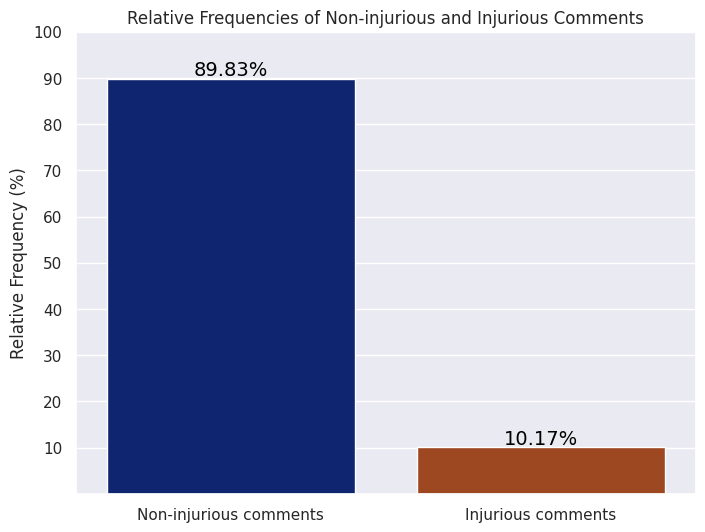

In [ ]:
sns.set_theme(palette='dark')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Non-injurious comments', 'Injurious comments'],
                 y=[perc_non_inj_comments, perc_inj_comments],
                 hue=['Non-injurious comments', 'Injurious comments'],
                 palette="dark",
                 legend=False)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 6),
                textcoords = 'offset points',
                color='black',
                fontsize=14)
plt.title('Relative Frequencies of Non-injurious and Injurious Comments')
plt.ylabel('Relative Frequency (%)')
plt.yticks(range(10, 110, 10))
plt.show()

Appare dunque evidente lo squilibrio tra i commenti non dannosi e i commenti dannosi.

### Frequenze relative delle labels

Si è visto che la stragrande maggioranza dei commenti presenti nel dataset è non dannoso e di conseguenza si può dedurre che le labels risultano sbilanciate essendo per almeno il 90 % dei casi pari a 0. Tuttavia, risulta utile conoscere nel detteglio anche la distribuzione di frequenze delle labels prendendo in considerazione soltanto il 10 % che costituisce i commenti dannosi. Si ricavano allora tali frequenze e barplot associato.

In [ ]:
labels_names = df.columns[1:-1]

labels_counts = df[labels_names].sum()
labels_perc = (labels_counts/len(inj_comments))*100
labels_df = pd.DataFrame({'Counts': labels_counts,
                          'Percentages': labels_perc.round(2)})

print('Absolute and Relative Frequencies of Judgments')
print(labels_df.sort_values(by=['Counts'], ascending=False))

Absolute and Relative Frequencies of Judgments
               Counts  Percentages
toxic           15294        94.26
obscene          8449        52.07
insult           7877        48.55
severe_toxic     1595         9.83
identity_hate    1405         8.66
threat            478         2.95


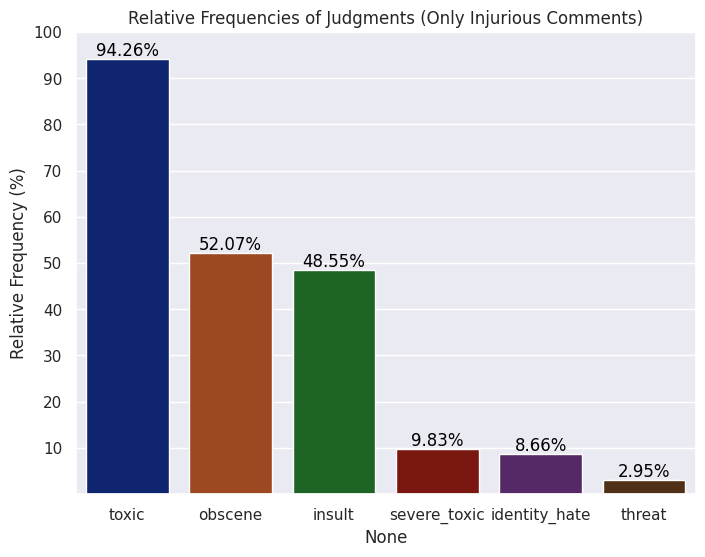

In [ ]:
labels_df_sorted = labels_df.sort_values(by=['Counts'], ascending=False)

sns.set_theme(palette='dark')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=labels_df_sorted.index,
                 y=labels_df_sorted['Percentages'],
                 hue=labels_df_sorted.index,
                 palette='dark',
                 legend=False)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 6),
                textcoords = 'offset points',
                color='black',
                fontsize=12)
plt.title('Relative Frequencies of Judgments (Only Injurious Comments)')
plt.ylabel('Relative Frequency (%)')
plt.yticks(range(10, 110, 10))
plt.show()

Si osserva che anche le diverse labels risultano sbilanciate tra di loro. I commenti dannosi sono costituiti per la quasi totalità dal giudizio *toxic* (94.26 %) e in circa metà dei casi dai giudizi *obscene* (52.07 %) e *insult* (48.55 %). I giudizi *severe_toxic* e *identity_hate* sono presenti rispettivamente con il 9.83 % e l'8.66 % e infine il giudizio *threat* è presente soltanto nel 2.95 % dei commenti dannosi.

### Matrice di co-occorrenza delle labels

Un altro aspetto interessante da analizzare è il numero di volte che ciascuna label è pari ad 1 simultaneamente alle altre labels. Per fare ciò può essere costruita una matrice di co-occorrenza che confronta a due a due le labels.

               toxic  severe_toxic  obscene  threat  insult  identity_hate
toxic          15294          1595     7926     449    7344           1302
severe_toxic    1595          1595     1517     112    1371            313
obscene         7926          1517     8449     301    6155           1032
threat           449           112      301     478     307             98
insult          7344          1371     6155     307    7877           1160
identity_hate   1302           313     1032      98    1160           1405


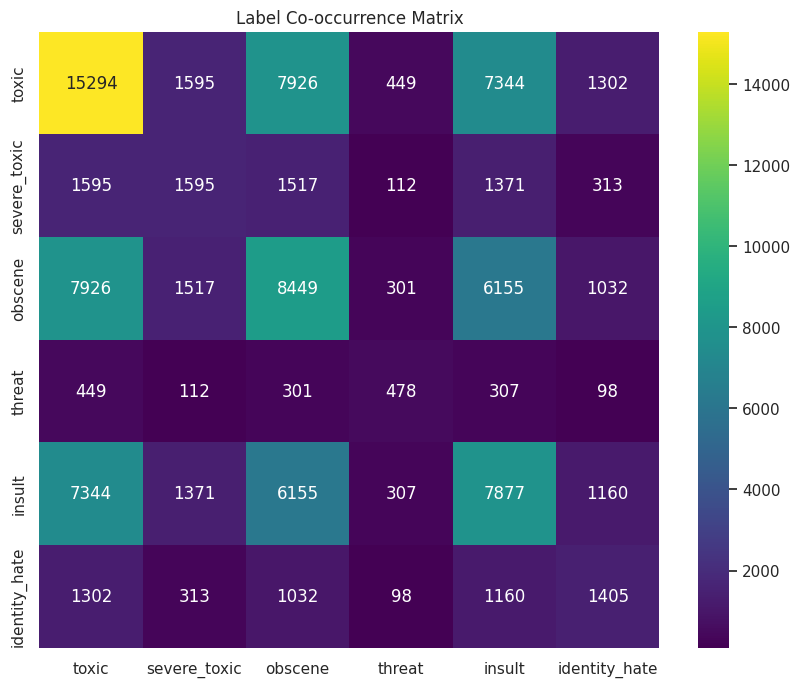

In [ ]:
label_cooccurrence_matrix = df[labels_names].T.dot(df[labels_names])
print(label_cooccurrence_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(label_cooccurrence_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Label Co-occurrence Matrix')
plt.show()

Dalla matrice di co-occorrenza ottenuta si possono dedurre le seguenti considerazioni:
* Il giudizio *toxic* come visto precedentemente è assegnato nel 94.26 % dei commenti dannosi e infatti esso risulta essere presente quasi sempre in simultanea con tutti gli altri giudizi.
* Il giudizio *severe_toxic* è nello specifico sempre presente in contemporanea al giudizio *toxic*. Ciò ha perfettamente senso dato che un giudizio gravemente tossico sarò senz'altro anche tossico. Inoltre *severe_toxic* è anche molte volte presente in contemporanea al giudizio *insult*.
* Il giudizio *obscene* è presente spesso contemporaneamente al giudizio *insult* e viceversa.
* Il giudizio *threat*, che è il meno presente, è spesso simultaneo ai giudizi *obscene* ed *insult*, ed è quasi del tutto presente in contemporanea al giudizio *toxic*.
* Il giudizio *identity_hate* è spesso presente insieme ai giudizi *obscene* ed *insult*.

Dunque, le labels, oltre ad avere frequenze sbilanciate sono anche spesso presenti simultaneamente. Quest'ultimo aspetto può rendere molto difficoltoso e poco efficace l'utilizzo di tecniche di bilanciamento manuali tramite oversampling/undersampling e per tale motivo in seguito si preferirà utilizzare dei pesi bilanciati per ogni label.

## Preprocessing dei dati


### Text Cleaner

Come primo passaggio è necessario preprocessare il testo eliminando l'insieme di token che non danno contributo significativo a livello semantico. Ciò può essere fatto creando la funzione *text_cleaner*
che effettua le seguenti operazioni:
* Conversione di tutte le parole in lowercase tramite il metodo *lower*.
* Rimozione della punteggiatura, di tutti i caratteri speciali e dei numeri tramite la funzione *sub* della libreria *re*.
* Rimozione di tutte le stopwords della lingua inglese (parole che non contribuiscono significativamente al significato del testo stesso) utilizzando la libreria *nltk* e lemmatizzazione (riduzione delle parole dalla forma flessa alla forma canonica) tramite il *WordNetLemmatizer* sempre all'interno di *nltk*.
* Rimozione di tutti gli spazi bianchi extra sempre tramite la funzione *sub* della libreria *re*.

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def text_cleaner(sentence):

    '''
    Cleans and preprocesses a given text sentence.

    This function performs the following operations:
    1. Converts the text to lowercase.
    2. Removes punctuation by replacing it with spaces.
    3. Removes digits.
    4. Filters out stopwords from the text.
    5. Lemmatizes the remaining words.
    6. Removes extra whitespace from the text.

    Parameters:
    - sentence (str): The input text sentence to be cleaned and preprocessed.

    Returns:
    - str: The cleaned and preprocessed text sentence.
    '''

    sentence = sentence.lower()
    sentence = re.sub(r'[^\w\s]', ' ', sentence)
    sentence = re.sub(r'\d+', '', sentence)
    sentence = ' '.join([word for word in sentence.split() if word not in stopwords])
    sentence = ' '.join([lemmatizer.lemmatize(word) for word in sentence.split()])
    sentence = re.sub(r'\s+', ' ', sentence).strip()

    return sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Si applica allora la funzione *text_cleaner* alla prima colonna del dataframe contenente le parti testuali *comment_text*.

In [ ]:
df['comment_text'] = df['comment_text'].apply(text_cleaner)
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,sum_injurious
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0
4,sir hero chance remember page,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,0
159567,ashamed horrible thing put talk page,0,0,0,0,0,0,0
159568,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,0
159569,look like actually put speedy first version de...,0,0,0,0,0,0,0


Il corpus testuale appare ora "pulito".

### Text Array e Labels Array

Successivamente vengono creati l'array numpy X contenente soltanto la colonna del dataset con i commenti testuali (*comment_text*) e l'array numpy y contenente le 6 labels: *toxic*, *severe_toxic*, *obscene*, *threat*, *insult* e *identity_hate*.

In [ ]:
X = df['comment_text'].values

y = df[['toxic',
        'severe_toxic',
        'obscene',
        'threat',
        'insult',
        'identity_hate']].values

print('Text array X')
print(X, X.shape)

print('\nLabels array y')
print(y, y.shape)

Text array X
['explanation edits made username hardcore metallica fan reverted vandalism closure gas voted new york doll fac please remove template talk page since retired'
 'aww match background colour seemingly stuck thanks talk january utc'
 'hey man really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info'
 ... 'spitzer umm there actual article prostitution ring crunch captain'
 'look like actually put speedy first version deleted look'
 'really think understand came idea bad right away kind community go bad idea go away instead helping rewrite'] (159571,)

Labels array y
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]] (159571, 6)


### Train-Validation-Test Set Split

Tramite la funzione *train_test_split* si va poi a suddividere il dataset in train set (70 %), validation set (20 %) e test set (10 %). Viene anche verificato che ciascuno dei tre set di dati abbia le labels distribuite con frequenze simili.

In [ ]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X,
                                                            y,
                                                            test_size=0.3,
                                                            random_state=1)

X_val, X_test, y_val, y_test = train_test_split(X_val_test,
                                                y_val_test,
                                                test_size=1/3,
                                                random_state=1)

print(f'Train set shape: {X_train.shape} {y_train.shape}')
print(f'Validation set shape: {X_val.shape} {y_val.shape}')
print(f'Test set shape: {X_test.shape} {y_test.shape}')

Train set shape: (111699,) (111699, 6)
Validation set shape: (31914,) (31914, 6)
Test set shape: (15958,) (15958, 6)


In [ ]:
train_labels_counts = pd.DataFrame(y_train, columns=labels_names).sum()
train_labels_perc = (train_labels_counts/len(y_train))*100
train_labels_df = pd.DataFrame({'Counts': train_labels_counts,
                                'Percentages': train_labels_perc.round(2)})
print('Absolute and Relative Frequencies of Train Set Labels:')
print(train_labels_df)

val_labels_counts = pd.DataFrame(y_val, columns=labels_names).sum()
val_labels_perc = (val_labels_counts/len(y_val))*100
val_labels_df = pd.DataFrame({'Counts': val_labels_counts,
                              'Percentages': val_labels_perc.round(2)})
print('\nAbsolute and Relative Frequencies of Validation Set Labels:')
print(val_labels_df)

test_label_counts = pd.DataFrame(y_test, columns=labels_names).sum()
test_label_perc = (test_label_counts/len(y_test))*100
test_label_df = pd.DataFrame({'Counts': test_label_counts,
                              'Percentages': test_label_perc.round(2)})
print('\nAbsolute and Relative Frequencies of Test Set Labels:')
print(test_label_df)

Absolute and Relative Frequencies of Train Set Labels:
               Counts  Percentages
toxic           10599         9.49
severe_toxic     1104         0.99
obscene          5905         5.29
threat            324         0.29
insult           5490         4.91
identity_hate     963         0.86

Absolute and Relative Frequencies of Validation Set Labels:
               Counts  Percentages
toxic            3145         9.85
severe_toxic      333         1.04
obscene          1718         5.38
threat            106         0.33
insult           1609         5.04
identity_hate     321         1.01

Absolute and Relative Frequencies of Test Set Labels:
               Counts  Percentages
toxic            1550         9.71
severe_toxic      158         0.99
obscene           826         5.18
threat             48         0.30
insult            778         4.88
identity_hate     121         0.76


I tre set di dati hanno le labels distribuite in maniera simile.

## **LOGISTIC REGRESSION**

Prima di valutare le prestazioni di modelli costituiti da layer ricorrenti è utile partire da un modello 'baseline' di **regressione logistica**.

### Tf-idf

Il corpus testuale viene trasformato in vettori numerici utilizzando la funzione **tf-idf** (term frequency-inverse document frequency) che da più peso ai termini più rari e penalizza quelli più comuni rispetto al count vectorizer che conta semplicemente le occorrenze. Per farlo viene utilizzato *TfidfVectorizer* di scikit-learn scegliendo di valutare soltanto le 10000 parole più frequenti (*max_features=10000*).

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f'X_train_tfidf shape: {X_train_tfidf.shape}')
print(f'X_val_tfidf shape: {X_val_tfidf.shape}')
print(f'X_test_ifidf shape: {X_test_tfidf.shape}')

X_train_tfidf shape: (111699, 10000)
X_val_tfidf shape: (31914, 10000)
X_test_ifidf shape: (15958, 10000)


### Multilabel Logistic Regression

Una volta vettorializzato il testo per effettuare la classificazione multilabel può essere utilizzato il classificatore *OneVsRestClassifier* specificando come argomento *estimator* una regressione logistica (*LogisticRegression*). In questo modo per ciascuna label viene creato un classificatore binario. Una volta creato e addestrato il modello vengono ricavate le sue predizioni sul train set e test set e i classification report ad essi associati (le metriche sono calcolate sulla classe positiva 1 di ciascuna label).

In [ ]:
lr = LogisticRegression(solver='liblinear', random_state=1)
clf = OneVsRestClassifier(lr)

clf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(random_state=1,
                                                 solver='liblinear'))

In [ ]:
y_pred_train = clf.predict(X_train_tfidf)
y_pred_test = clf.predict(X_test_tfidf)

Per mandare a schermo i classification reports viene creata la funzione *print_classification_reports* che verrà utilizzata per questo e tutti i successivi modelli. Tale funzione prende in input il nome del modello in esame, le previsioni che tale modello effettua sul train e test set e gli array con le true labels che sono di default *y_train* e *y_test* (definiti in precedenza e che resteranno invariati).

In [ ]:
def print_classification_reports(model_name,
                                 y_pred_train,
                                 y_pred_test,
                                 y_train=y_train,
                                 y_test=y_test):

    '''
    Prints classification reports for both training and test sets.

    Parameters:
    - model_name (str): Name of the model.
    - y_pred_train (array-like): Predicted labels for the training set.
    - y_pred_test (array-like): Predicted labels for the test set.
    - y_train (array-like, optional): True labels for the training set.
      Default is 'y_train'.
    - y_test (array-like, optional): True labels for the test set.
      Default is 'y_test'.

    Returns:
    - None: Prints classification reports with precision, recall, and F1-score.
    '''

    print(f'{model_name} - Classification Report - Train Set')
    print(classification_report(y_train,
                                y_pred_train,
                                target_names=labels_names,
                                zero_division=1))

    print(f'\n{model_name} - Classification Report - Test Set')
    print(classification_report(y_test,
                                y_pred_test,
                                target_names=labels_names,
                                zero_division=1))

Si utilizza allora *print_classification_reports* per valutare *precision*, *recall* ed *f1-score* che si ottengono con il modello di regressione logistica.

In [ ]:
print_classification_reports(model_name='Logistic Regression',
                             y_pred_train=y_pred_train,
                             y_pred_test=y_pred_test)

Logistic Regression - Classification Report - Train Set
               precision    recall  f1-score   support

        toxic       0.94      0.64      0.76     10599
 severe_toxic       0.62      0.28      0.38      1104
      obscene       0.93      0.67      0.78      5905
       threat       0.68      0.11      0.19       324
       insult       0.85      0.56      0.68      5490
identity_hate       0.76      0.21      0.33       963

    micro avg       0.90      0.59      0.71     24385
    macro avg       0.80      0.41      0.52     24385
 weighted avg       0.89      0.59      0.70     24385
  samples avg       0.99      0.95      0.95     24385


Logistic Regression - Classification Report - Test Set
               precision    recall  f1-score   support

        toxic       0.92      0.60      0.73      1550
 severe_toxic       0.45      0.22      0.29       158
      obscene       0.90      0.65      0.76       826
       threat       0.60      0.06      0.11        48
    

Osservando i classification reports si può innanzitutto constatare l'assenza di un significativo overfitting.

La metrica più importante a cui si può far riferimento per questo problema di classificazione multilabel con labels sbilanciate è sicuramente l'**F1-score** (l'accuracy in questo caso non è molto informativa essendo la classe 0 preponderante) che rappresenta la media armonica tra precision e recall. Un suo valore alto assicura che le performance siano equilibrate tra le due metriche, penalizzando fortemente situazioni in cui uno dei due valori è basso.<br> Si osserva in questo caso come le labels più frequenti *toxic*, *obscene* ed *insult* abbiano F1-score decisamente più alti (comunque non soddisfacenti) rispetto alle labels meno frequenti *severe_toxic*, *threat* e *identity_hate* (0.73, 0.76 e 0.62 contro 0.29, 0.11 e 0.28). Questo risultato era atteso ed è chiaramente dovuto al fatto che il modello non riesce ad individuare correttamente le labels meno frequenti che hanno soprattutto delle recall bassissime (0.22, 0.06 e 0.18).

### Multilabel Logistic Regression + class_weight='balanced'

Per tentare di porre rimedio ai problemi causati dallo sbilanciamento delle labels è possibile utilizzando come argomento del classificatore *LogisticRegression* il parametro *class_weight="balanced"*. Questo parametro bilancia la labels applicando dei pesi inversamente proporzionali alle frequenze delle loro classi 0 ed 1. Dunque, il classificatore *OneVsRestClassifier* costruirà un classificatore binario per ciascuna label con le classi bilanciate.<br>
Di seguito vengono ricercati il tipo di regolarizzazione (L1 o L2) e il parametro C (inverso del parametro di regolarizzazione λ) che massimizzano l'**F1-score macro** sul validation set del modello OvR con i pesi bilanciati. Si sceglie di valutare l'F1 macro (media aritmetica) e non weighted (media pesata) poichè si vogliono ottenere miglioramenti per le labels meno frequenti in particolare.

In [ ]:
penalties = ['l1', 'l2']
c_values = [0.01, 0.1, 1, 10, 100]

f1_scores_val = {}

for penalty in penalties:
    for C in c_values:
        lr = LogisticRegression(solver='liblinear',
                                class_weight='balanced',
                                penalty=penalty,
                                C=C,
                                random_state=1)
        clf = OneVsRestClassifier(lr)
        clf.fit(X_train_tfidf, y_train)

        y_pred_val = clf.predict(X_val_tfidf)
        f1_macro_val = f1_score(y_val, y_pred_val, average='macro')

        f1_scores_val[(penalty, C)] = f1_macro_val

best_penalty_c = max(f1_scores_val, key=f1_scores_val.get)
best_f1 = f1_scores_val[best_penalty_c]

print(f'Best penalty and C: {best_penalty_c}')
print(f'Validation set F1-score: {best_f1:.4f}')

Best penalty and C: ('l2', 10)
Validation set F1-score: 0.5554


Si può constatare che l'F1-score macro viene massimizzato utilizzando la regolarizzazione L2 con il parametro C pari a 10, raggiungendo il 55.54 %. Si usano allora tali parametri per verificare le prestazioni sul test set.

In [ ]:
lr = LogisticRegression(solver='liblinear',
                        class_weight='balanced',
                        penalty='l2',
                        C=10,
                        random_state=1)
clf = OneVsRestClassifier(lr)

clf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight='balanced',
                                                 random_state=1,
                                                 solver='liblinear'))

In [ ]:
y_pred_train = clf.predict(X_train_tfidf)
y_pred_test = clf.predict(X_test_tfidf)

print_classification_reports(
    model_name="Logistic Regression + class_weight='balanced'",
    y_pred_train=y_pred_train,
    y_pred_test=y_pred_test)

Logistic Regression + class_weight='balanced' - Classification Report - Train Set
               precision    recall  f1-score   support

        toxic       0.69      0.97      0.81     10599
 severe_toxic       0.37      1.00      0.54      1104
      obscene       0.74      0.99      0.85      5905
       threat       0.48      1.00      0.65       324
       insult       0.62      0.99      0.76      5490
identity_hate       0.35      1.00      0.52       963

    micro avg       0.63      0.98      0.77     24385
    macro avg       0.54      0.99      0.69     24385
 weighted avg       0.66      0.98      0.78     24385
  samples avg       0.94      1.00      0.94     24385


Logistic Regression + class_weight='balanced' - Classification Report - Test Set
               precision    recall  f1-score   support

        toxic       0.62      0.85      0.71      1550
 severe_toxic       0.26      0.73      0.38       158
      obscene       0.63      0.86      0.73       826
       

Con i pesi bilanciati e la regolarizzazione L2 l'F1 macro passa da 0.46 a 0.51 con importanti miglioramenti sulle labels meno frequenti: l'F1-score di *severe_toxic*, *threat* e *identity_hate* è passato da 0.29, 0.11 e 0.28 a 0.38, 0.28 e 0.35. L'F1-score delle labels *toxic*, *obscene* e *insult* è invece diminuito leggermente passando da 0.73, 0.76 e 0.62 a 0.71, 0.73 e 0.61. Si può però notare un significativo overfitting essendo le prestazioni sul train set nettamente migliori rispetto a quelle sul test set.<br>
In conclusione si può confermare l'efficacia del bilanciamento delle labels ma le prestazioni della regressione logistica, come da aspettativa, risultano non particolarmente soddisfacenti per il presente problema e si dovrà ricorrere a modelli più complessi e adatti.


## **DEEP LEARNING**

Dopo aver valutato il modello "baseline" di regressione logistica si può passare a valutare l'efficacia di modelli di deep learning costituiti da layer ricorrenti che sono i più adatti in presenza di corpus testuali.

### Trasformazione del corpus testuale in sequenze tramite tokenizer

Per far si che i modelli di deep learning riescano a interpretare il corpus testuale è necessario trasformare quest'ultimo in sequenze numeriche e lo si può fare utilizzando la classe *Tokenizer* di keras. Viene instanziato il tokenizer e si sceglie di utilizzare come vocabolario soltanto le 10000 parole più frequenti e inserire il carattere speciale OOV (Out-of-Vocabulary) nel caso in cui la parola non sia presente in esso. Successivamente con il metodo *fit_on_texts* del tokenizer viene effettuta la tokenizzazione del testo presente nel train set. Il risultato ottenuto è che ogni parola unica nel testo riceve un proprio indice univoco. Viene poi mandate a schermo la lunghezza del vocabolario *vocabulary_size*, la lunghezza del *word_index* contenente la totalità delle parole uniche e le prime 5 parole appartenenti al *word_index* a titolo esemplificativo.  

In [ ]:
vocabulary_size = 10000
tokenizer = Tokenizer(num_words=vocabulary_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

print(f'Vocabulary size: {vocabulary_size}')
print(f'Size of word_index: {len(tokenizer.word_index)}')
print(f'First five word_index: {list(tokenizer.word_index.items())[:5]}')

Vocabulary size: 10000
Size of word_index: 132150
First five word_index: [('<OOV>', 1), ('article', 2), ('page', 3), ('wikipedia', 4), ('talk', 5)]


Le parole uniche presenti nel train set sono 132149 più il carattere speciale OOV presente con indice 1.

Successivamente tramite il metodo *texts_to_sequences*  viene convertito il testo in sequenze di indici numerici, dove ogni parola è rappresentata dal suo indice nel vocabolario (ciò viene fatto per il train, validation e test set).

In [ ]:
train_sequences= tokenizer.texts_to_sequences(X_train)
val_sequences= tokenizer.texts_to_sequences(X_val)
test_sequences= tokenizer.texts_to_sequences(X_test)

print(f'First sequence of train sequences: {train_sequences[0]}')
print(f'First sequence of validation sequences: {val_sequences[0]}')
print(f'First sequence of test sequences: {test_sequences[0]}')

First sequence of train sequences: [340, 3347, 278, 4343, 329, 340, 3347, 4, 3347, 1359, 188, 99]
First sequence of validation sequences: [35, 945, 2642, 1200, 382, 8, 1, 4013, 180, 1018, 2753, 467, 83, 67, 4013]
First sequence of test sequences: [32, 1371, 1, 6648, 356, 824, 939, 4211, 3, 1101, 355, 1820, 139, 125, 565, 7931, 19, 63, 756, 2653, 3, 12, 58, 208, 285, 82, 565, 209, 756, 16, 127, 8376, 1818, 658, 684, 84, 340, 2, 23, 65, 115, 1, 75]


I diversi commenti testuali, quindi, sono stati tutti trasformati in sequenze numeriche come si può osservare dalle prime sequenze del train, del validation e del test set mandate a schermo.

È opportuno valutare anche la lunghezza delle varie sequenze pertanto viene costruito un barplot per visualizzare la distribuzione delle lunghezze e vengono calcolate media, mediana e massimo.

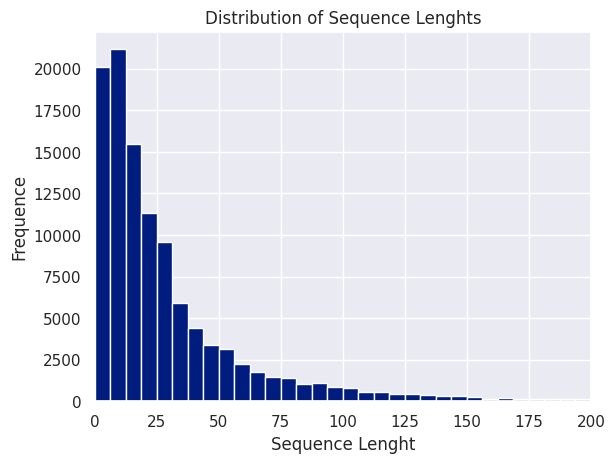


Mean lenght of sequences: 34.69
Median lenght of sequences: 18.0
Max lenght of sequences: 1250


In [ ]:
sequence_lengths = [len(seq) for seq in train_sequences]

plt.hist(sequence_lengths, bins=200)
plt.xlabel('Sequence Lenght')
plt.ylabel('Frequence')
plt.title('Distribution of Sequence Lenghts')
plt.xlim(0, 200)
plt.show()

print(f'\nMean lenght of sequences: {np.mean(sequence_lengths):.2f}')
print(f'Median lenght of sequences: {np.median(sequence_lengths)}')
print(f'Max lenght of sequences: {max(sequence_lengths)}')

Le sequenze ottenute sono di lunghezza diversa, quindi si dovrà fare "padding" (riempimento con zeri) o "truncation" (troncamento) delle sequenze per garantire che tutte abbiano la stessa lunghezza. Ciò è necessario perché il modello di deep learning richiede input di lunghezza fissa.<br>
Bisogna però fissare la lunghezza massima scegliendo tra diverse possibilità. In questo caso si sceglie di utilizare il 90° percentile delle lunghezze delle sequenze in modo che la maggior parte delle sequenze sarà completamente inclusa senza perdere troppe informazioni a causa del troncamento.

In [ ]:
maxlen = int(np.percentile(sequence_lengths, 90))
print(f"maxlen: {maxlen}")

maxlen: 77


La lunghezza di ciascuna sequenza sarà dunque pari a 77.

Quindi infine, grazie alla funzione *pad_sequence* di keras, specificando tra gli argomenti la maxlen di 77 e *padding='post'* e *truncating='post'*, si ottengono le sequenze numeriche definitive per il train set, per il validation set e per il test set.

In [ ]:
padded_train_sequences = pad_sequences(train_sequences,
                                       maxlen=maxlen,
                                       padding='post',
                                       truncating='post')
padded_val_sequences = pad_sequences(val_sequences,
                                     maxlen=maxlen,
                                     padding='post',
                                     truncating='post')
padded_test_sequences = pad_sequences(test_sequences,
                                      maxlen=maxlen,
                                      padding='post',
                                      truncating='post')

print(f'Shape of padded train sequences: {padded_train_sequences.shape}')
print(f'Shape of padded validation sequences: {padded_val_sequences.shape}')
print(f'Shape of padded test sequences: {padded_test_sequences.shape}')

print(f'\nFirst sequence of padded train sequences: {padded_train_sequences[0]}')
print(f'First sequence of padded validation sequences: {padded_val_sequences[0]}')
print(f'First sequence of padded test sequences: {padded_test_sequences[0]}')

Shape of padded train sequences: (111699, 77)
Shape of padded validation sequences: (31914, 77)
Shape of padded test sequences: (15958, 77)

First sequence of padded train sequences: [ 340 3347  278 4343  329  340 3347    4 3347 1359  188   99    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]
First sequence of padded validation sequences: [  35  945 2642 1200  382    8    1 4013  180 1018 2753  467   83   67
 4013    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0   

Si hanno in conclusione 111699 sequenze con 77 elementi ciascuna per il train set, 31914 sequenze con 77 elementi per il validation set e 15958 sequenze sempre di lunghezza 77 per il test set.

### Scelta della tipologia di reti neurali da valutare

Terminata la fase di tokenizzazione del testo si può procedere alla creazione e valutazione tramite keras dei seguenti modelli di reti neuali ricorrenti:
1. **LSTM Model**:
2. **Bidirectional LSTM Model**
3. **Convolutional Bidirectional LSTM Model**

Sono state scelte queste precise tipologie di reti neurali perchè si ritiene possano essere le più adatte alla risoluzione del presente problema.

### Funzioni per il training e l'evaluation

Prima di costruire i modelli risulta innanzitutto opportuno creare delle funzioni utili all'addestramento e alla valutazione di essi.

La prima funzione che viene definita è la ***weighted_binary_crossentropy***. Essa restituisce una funzione di perdita che calcola la cross-entropia binaria ponderata tra le etichette reali (*y_true*) e le probabilità previste (*y_pred)* applicando dei pesi personalizzati per ciascuna label. Il risultato finale che si ottiene è la **perdita media pesata** (*loss*). I pesi da applicare, *class_weights*, passati di default alla funzione,vengono calcolati come l'inverso delle frequenze relative delle classi positive delle labels (viene effettuata anche la normalizzazione). L'obiettivo di questa funzione personalizzata è chiaramente quello di cercare di contrastare lo sbilanciamento delle classi delle labels durante l'addestramento.

In [ ]:
num_samples = y_train.shape[0]
class_counts = np.sum(y_train, axis=0)
class_weights = num_samples/class_counts
class_weights = class_weights/np.sum(class_weights)

print(f'Class weights for each label:\n{np.round(class_weights, 2)}')

Class weights for each label:
[0.02 0.17 0.03 0.56 0.03 0.19]


I pesi personalizzati sono stati calcolati correttamente. Si può ad esempio osservare come alla label meno frequente *threat* è stato assegnato il peso maggiore, 56 %, mentre alla label più frequente *toxic* il peso minore, 2 %.

In [ ]:
def weighted_binary_crossentropy(weights=class_weights):

    '''
    Returns a weighted binary cross-entropy loss function.

    Parameters:
    - weights (array-like, optional): Class weights for adjusting the loss.
      Default is 'class_weights'.

    Returns:
    - loss (function): A function that computes the weighted binary-crossentropy
      between the true labels ('y_true') and the predicted labels ('y_pred').
    '''

    def loss(y_true, y_pred):

        '''
        Computes the weighted binary cross-entropy loss.

        Parameters:
        - y_true (tensor): Ground truth binary labels.
        - y_pred (tensor): Predicted probabilities for the positive class.

        Returns:
        - Tensor: The mean weighted binary cross-entropy loss.
        '''

        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        bce = - (y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
        weighted_bce = bce * weights

        return tf.reduce_mean(weighted_bce)

    return loss

Successivamente viene definita la funzione ***compile_model*** che serve per l'appunto ad effettuare la compilazione del modello. Tale funzione prende in input come parametri il nome del modello sequenziale *model* e *learning_rate*, di default pari a 1e-3. L'optimizer utilizzato è *Adam* con la possibilità quindi di sperimentare diversi learning rate rispetto a quello di default. La *loss* viene calcolata grazie alla funzione *weighted_binary_crossentropy* con i pesi personalizzati come argomento di default. Infine, si sceglie di utilizzare come metriche di valutazione del modello, *metrics*, l'F1-score sia macro che weighted in modo da stimare l'impatto che hanno le labels meno frequenti sulle prestazioni della rete neurale.

In [ ]:
def compile_model(model, learning_rate=1e-3):

    '''
    Compiles a model with weighted binary cross-entropy loss and F1 metrics.

    Parameters:
    - model (tf.keras.Model): The model to be compiled.
    - learning_rate (float, optional): Learning rate for the Adam optimizer.
      Default is 1e-3.

    Returns:
    - None: The function compiles the model in-place with the specified
      optimizer, loss, and metrics.
    '''

    f1_scores = [F1Score(name='f1_macro', average='macro', threshold=0.5),
                 F1Score(name='f1_weighted', average='weighted', threshold=0.5)]

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss=weighted_binary_crossentropy(),
                  metrics=f1_scores)

A questo punto si può definire la funzione di addestramento della rete ***train_model***. Tale funzione prende in input come parametri:
* *model*: modello di rete neurale in esame.
* *batch_size*: numero di samples in ciascun batch.
* *early_stopping*: early stopping impostato di default a *None*.
* *padded_train_sequences*, *y_train*, *padded_val_sequences*, *y_val*: le sequenze numeriche di training e validation e relative labels hanno tutti valori di default che non verranno mai cambiati (si tratta semplicemente dei dati preprocessati e tokenizzati in precedenza).

L'early stopping viene instanziato a *None* poichè ad ogni nuovo utilizzo della funzione di addestramento deve essere ridefinito. Viene utilizzato l'*EarlyStopping* di keras scegliendo di monitorare *val_f1_macro* e stoppando l'addestramento qualora non vi siano miglioramenti per 3 epoche consecutive (i pesi vengono riportati a quelli ottenuti nella migliore epoca).<br> Viene poi costruita la *history* in cui il modello viene addestrato con il metodo *fit* con argomenti: *padded_train_sequences* e *y_train* che rappresentano il set di sequenze da addestrare con le corrispettive labels, *validation_data=(padded_val_sequences, y_val)* che costituisce il validation set, *batch_size* e *epochs* che vanno scelti, *early_stopping* come *callbacks* e *verbose=1* per monitorare le metriche ad ogni epoca. Infine, la funzione restituisce tale variabile history, che contiene tutte le metriche e le loss registrate durante l'addestramento e la validazione.

In [ ]:
def train_model(model,
                batch_size,
                epochs,
                early_stopping=None,
                padded_train_sequences=padded_train_sequences,
                y_train=y_train,
                padded_val_sequences=padded_val_sequences,
                y_val=y_val):

    '''
    Trains the model with specified training and validation data.

    Parameters:
    - model (tf.keras.Model): The model to be trained.
    - batch_size (int): Number of samples per gradient update.
    - epochs (int): Number of epochs to train the model.
    - early_stopping (tf.keras.callbacks.EarlyStopping, optional):
      Callback to stop training when a monitored metric has stopped improving.
      Default is None.
    - padded_train_sequences (array-like, optional): Padded input sequences
      for training. Default is 'padded_train_sequences'.
    - y_train (array-like, optional): Ground truth labels for training.
      Default is 'y_train'.
    - padded_val_sequences (array-like, optional): Padded input sequences
      for validation. Default is 'padded_val_sequences'.
    - y_val (array-like, optional): Ground truth labels for validation.
      Default is 'y_val'.

    Returns:
    - history (tf.keras.callbacks.History): Training history containing loss
      and metrics recorded during training.
    '''

    if early_stopping is None:
        early_stopping = EarlyStopping(monitor='val_f1_macro',
                                       mode='max',
                                       patience=3,
                                       restore_best_weights=True,
                                       verbose=1)

    history = model.fit(padded_train_sequences,
                        y_train,
                        validation_data=(padded_val_sequences, y_val),
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=[early_stopping],
                        verbose=1)

    return history

L'ultima funzione che viene definita è *plot_learning_curve* che prende in input la *history* del modello e la metrica da valutare *metric* (*'f1_macro'* di default) stampando le relative curve di apprendimento sul training e sul validation set.

In [ ]:
def plot_learning_curve(history, metric='f1_macro'):

    """
    Plots the learning curve for a specified metric.

    Parameters:
    - history (tf.keras.callbacks.History): History object containing training
      metrics recorded during model training.
    - metric (str, optional): The metric to plot. Default is 'f1_macro'.

    Returns:
    - None: Displays the learning curve plot for training and validation metrics.
    """

    epochs = range(1, len(history.history[metric]) + 1)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history[metric], label='train')
    plt.plot(epochs, history.history['val_' + metric], label='validation')
    plt.title(f'{metric.capitalize()} Score')
    plt.xticks(epochs)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

#### LSTM Model

Il primo modello di rete neurale che viene costruito è l'**LSTM Model**. La rete viene creata con il modello sequenziale di keras (*Sequential*) che consente di aggiungere uno dopo l'altro i seguenti strati:
* Il primo strato ***Input*** specifica la dimensione dell'input come *(maxlen,)*, il che significa che ogni esempio in input è una sequenza di lunghezza 77.
* Il secondo strato, lo strato ***Embedding***, ha dimensioni di input pari al *vocabulary_size* (10000), e la dimensione di embedding è impostata su 128. Questo strato dunque trasforma ciascun token della sequenza in un vettore denso di 128 dimensioni, utile per rappresentare il significato delle parole in modo compatto.
* Il terzo strato è un ***LSTM*** (Long Short-Term Memory) con 128 unità al suo interno. L'*activation* e la *recurrent_activation* sono quelle di default: rispettivamente tangente iperbolica e sigmoide. Questo layer ricorrente memorizza le informazioni significative e scarta le parti del testo che non danno contributo per il task di riferimento. L'uscita di questo strato sarà una rappresentazione compatta della sequenza.
* Il quarto strato è un layer di ***Dropout*** che viene utilizzato per prevenire l'overfitting durante l'addestramento del modello. Esso imposta un tasso di dropout del 50 %, il che significa che metà dei neuroni dello strato precedente viene ignorata a ogni iterazione di addestramento.
* Infine, si ha lo strato ***Dense*** (fully-connected) costituito da 6 neuroni. Tale strato utilizza come funzione di attivazione la sigmoide per effettuare la classificazione binaria per ciascuna delle 6 labels (si ottiene una probabilità tra 0 e 1).

Gli iperparametri scelti, come il numero di layer e di neuroni, sono frutto di diversi tentativi e sono quelli che hanno portato alle migliori prestazioni (lo stesso concetto vale anche per i successivi due modelli che verranno creati).

Dopodichè il modello, chiamato *LSTM_model*, viene compilato tramite la funzione *compile_model* con tutti i parametri di default e viene mandato a schermo il *summary* della rete.


In [ ]:
clear_session()

LSTM_model = Sequential(name='LSTM_model')
LSTM_model.add(Input(shape=(maxlen,)))
LSTM_model.add(Embedding(input_dim=vocabulary_size, output_dim=128))
LSTM_model.add(LSTM(units=128))
LSTM_model.add(Dropout(rate=0.5))
LSTM_model.add(Dense(units=6, activation='sigmoid'))

compile_model(LSTM_model)

LSTM_model.summary()

Model: "LSTM_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 77, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,412,358 (5.39 MB)

 Trainable params: 1,412,358 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

Il modello è costituito da 1 412 358 parametri addestrabili.

A questo punto si può procedere con l'addestramento della rete neurale ricorrente tramite la funzione *train_model* utilizzando un *batch_size* di 32 e 20 *epochs*.

In [ ]:
history_LSTM = train_model(LSTM_model,
                           batch_size=32,
                           epochs=20)

val_f1_scores_LSTM = LSTM_model.evaluate(padded_val_sequences, y_val, verbose=0)

print(f'\nValidation F1-score macro LSTM: {val_f1_scores_LSTM[1]:.4f}')
print(f'Validation F1-score weighted LSTM: {val_f1_scores_LSTM[2]:.4f}')

Epoch 1/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - f1_macro: 0.0106 - f1_weighted: 0.0172 - loss: 0.0099 - val_f1_macro: 0.0000e+00 - val_f1_weighted: 0.0000e+00 - val_loss: 0.0086
Epoch 2/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - f1_macro: 0.0087 - f1_weighted: 0.0157 - loss: 0.0081 - val_f1_macro: 0.3284 - val_f1_weighted: 0.5739 - val_loss: 0.0054
Epoch 3/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - f1_macro: 0.3450 - f1_weighted: 0.6098 - loss: 0.0047 - val_f1_macro: 0.3631 - val_f1_weighted: 0.6567 - val_loss: 0.0044
Epoch 4/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - f1_macro: 0.3778 - f1_weighted: 0.6620 - loss: 0.0039 - val_f1_macro: 0.4009 - val_f1_weighted: 0.6484 - val_loss: 0.0042
Epoch 5/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - f1_macro: 0.4188 - f1_weighted: 0.6840 - loss: 0.0035 - val_f1_macro: 0.4384 - val_f1_weighted: 0.6789 - val_loss: 0.0043
Epoch 6/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - f1_macro: 0.4331 - f1_weighted: 0.7025 -

L'early stopping si è attivato all'epoca 15, pertanto le prestazioni migliori sull'F1-score macro del validation set sono state ottenute al termine dell'epoca 12: 58.32 %. L'F1-score weighted è invece pari al 69.84 %.<br>
Di seguito viene mandata a schermo anche la learning curve dell'addestramento sull'F1 macro tramite la funzione *plot_learning_curve*.

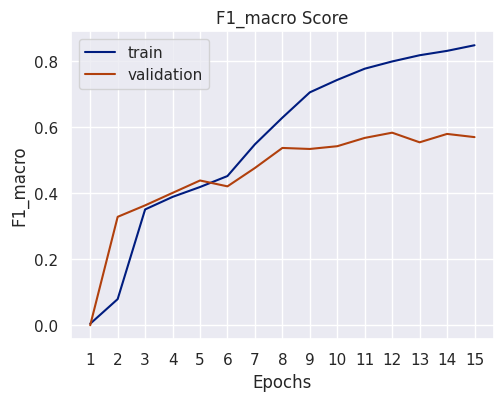

In [ ]:
learning_curve_LSTM = plot_learning_curve(history_LSTM)

Si può vedere come la curva di validation aumenti fino all'epoca 12 per poi iniziare ad appiattirsi ed abbassarsi. È evidente la presenza di un significativo overfitting poichè si osserva come la curva di training continui a salire al contrario di quella di validation.

Vengono ricavate allora l'F1-score macro e weighted sul test set tramite la funzione *evaluate*.

In [ ]:
test_f1_scores_LSTM = LSTM_model.evaluate(padded_test_sequences, y_test, verbose=0)

print(f'Test F1-score macro LSTM: {test_f1_scores_LSTM[1]:.4f}')
print(f'Test F1-score weighted LSTM: {test_f1_scores_LSTM[2]:.4f}')

Test F1-score macro LSTM: 0.5557
Test F1-score weighted LSTM: 0.6968


L'F1-score macro sul test set è pari al 55.57 % ed è maggiore rispetto a quello ottenuto con la regressione logistica pari al 51.11 %. Allo stesso modo l'F1-score weighted migliora passando dal 66.04 % al 69.68 %.

Di seguito si ricavano le previsioni del modello sul train e test set e si valutano anche le altre metriche utilizzando la funzione *print_classification_reports*.

In [ ]:
y_pred_train_LSTM = (LSTM_model.predict(padded_train_sequences, verbose=0) > 0.5)
y_pred_test_LSTM = (LSTM_model.predict(padded_test_sequences, verbose=0) > 0.5)

print_classification_reports(model_name='LSTM',
                             y_pred_train=y_pred_train_LSTM,
                             y_pred_test=y_pred_test_LSTM)

LSTM - Classification Report - Train Set
               precision    recall  f1-score   support

        toxic       0.90      0.82      0.86     10599
 severe_toxic       0.77      0.71      0.74      1104
      obscene       0.90      0.87      0.89      5905
       threat       0.93      0.98      0.95       324
       insult       0.80      0.79      0.79      5490
identity_hate       0.88      0.79      0.83       963

    micro avg       0.87      0.82      0.84     24385
    macro avg       0.86      0.83      0.84     24385
 weighted avg       0.87      0.82      0.84     24385
  samples avg       0.99      0.97      0.97     24385


LSTM - Classification Report - Test Set
               precision    recall  f1-score   support

        toxic       0.77      0.72      0.75      1550
 severe_toxic       0.38      0.40      0.39       158
      obscene       0.79      0.73      0.76       826
       threat       0.41      0.29      0.34        48
       insult       0.67      0.64

Analizzando singolarmente le metriche si osserva un miglioramento sull'F1 su ciascuna label rispetto alla regressione logistica: le labels più frequenti *toxic*, *obscene* e *insult* sono passate da un F1 di 0.71, 0.73 e 0.61 ad un F1 di 0.75, 0.76 e 0.66 mentre le labels meno frequenti *severe_toxic*, *threat* e *identity_hate* sono passate da 0.38, 0.28 e 0.35 a 0.39, 0.34 e 0.44. Appare però evidente il problema dell'overfitting confrontando le metriche di training e di testing.

#### Bidirectional LSTM Model

Il secondo modello che viene valutato è il **Bidirectional LSTM Model**. L'architettura di questo modello è identica a quella del precedente con l'unica differenza nel layer ricorrente che non è più una sempilce *LSTM* ma un *Bidirectional LSTM*. Si tratta di una variante dell'LSTM unidirezionale in cui l'informazione fluisce non solo da sinistra verso destra ma anche da destra verso sinistra in modo da apprendere sia il contesto passato che quello futuro.

Si procede allora alla creazione e compilazione del modello sequenziale analogamente al precedente modello.

In [ ]:
clear_session()

BiLSTM = Sequential(name='BiLSTM')
BiLSTM.add(Input(shape=(maxlen,)))
BiLSTM.add(Embedding(input_dim=vocabulary_size, output_dim=128))
BiLSTM.add(Bidirectional(LSTM(units=128)))
BiLSTM.add(Dropout(rate=0.5))
BiLSTM.add(Dense(units=6, activation='sigmoid'))

compile_model(BiLSTM)

BiLSTM.summary()

Model: "BiLSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 77, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 256)                 │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,544,710 (5.89 MB)

 Trainable params: 1,544,710 (5.89 MB)

 Non-trainable params: 0 (0.00 B)

Il modello è ora costituito da 1 544 710  parametri addestrabili.

L'addestramento della rete viene eseguito sempre tramite la funzione *train_model* con i parametri *batch_size* e *epochs* pari rispettivamente a 32 e 20.

In [ ]:
history_BiLSTM = train_model(BiLSTM,
                             batch_size=32,
                             epochs=20)

val_f1_scores_BiLSTM = BiLSTM.evaluate(padded_val_sequences, y_val, verbose=0)

print(f'\nValidation F1-score macro BiLSTM: {val_f1_scores_BiLSTM[1]:.4f}')
print(f'Validation F1-score weighted BiLSTM: {val_f1_scores_BiLSTM[2]:.4f}')

Epoch 1/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - f1_macro: 0.1979 - f1_weighted: 0.3324 - loss: 0.0079 - val_f1_macro: 0.4270 - val_f1_weighted: 0.6821 - val_loss: 0.0042
Epoch 2/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - f1_macro: 0.4411 - f1_weighted: 0.6901 - loss: 0.0037 - val_f1_macro: 0.4684 - val_f1_weighted: 0.6940 - val_loss: 0.0036
Epoch 3/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - f1_macro: 0.5790 - f1_weighted: 0.7262 - loss: 0.0029 - val_f1_macro: 0.5718 - val_f1_weighted: 0.7186 - val_loss: 0.0036
Epoch 4/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - f1_macro: 0.6647 - f1_weighted: 0.7539 - loss: 0.0024 - val_f1_macro: 0.5928 - val_f1_weighted: 0.7263 - val_loss: 0.0038
Epoch 5/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - f1_macro: 0.7057 - f1_weighted: 0.7725 - loss: 0.0021 - val_f1_macro: 0.6036 - val_f1_weighted: 0.7299 - val_loss: 0.0038
Epoch 6/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - f1_macro: 0.7365 - f1_weighted: 0.7824 - l

L'early stopping si è attivato all'epoca 9 pertanto le prestazioni migliori sull'F1-score macro del validation set sono state ottenute al termine dell'epoca 6: 62.13 %. L'F1-score weighted è invece pari al 73.38 %.<br>
Viene mandata a schermo la learning curve dell'addestramento sull'F1 macro sempre tramite la funzione *plot_learning_curve*.

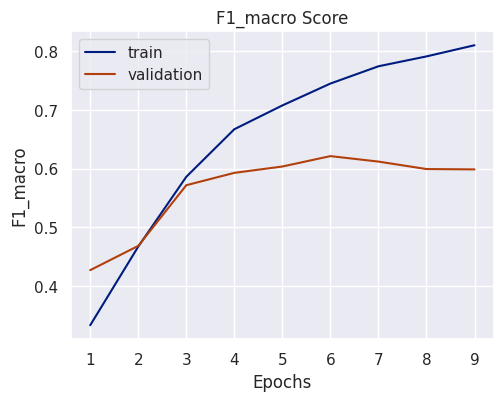

In [ ]:
learning_curve_BiLSTM = plot_learning_curve(history_BiLSTM)

Si può osservare come la curva di validation aumenti fino all'epoca 6 per poi iniziare ad appiattirsi ed abbassarsi. È sempre evidente però la presenza di un significativo overfitting poichè la curva di training continua a salire al contrario di quella di validation.

Vengono ricavate allora l'F1-score macro e weighted sul test set tramite la funzione *evaluate*.

In [ ]:
test_f1_scores_BiLSTM = BiLSTM.evaluate(padded_test_sequences, y_test, verbose=0)

print(f'Test F1-score macro BiLSTM: {test_f1_scores_BiLSTM[1]:.4f}')
print(f'Test F1-score weighted BiLSTM: {test_f1_scores_BiLSTM[2]:.4f}')

Test F1-score macro BiLSTM: 0.5871
Test F1-score weighted BiLSTM: 0.7277


Le metriche ottenute sono innanzitutto inferiori a quelle ottenute sul validation set. L'F1-score macro sul test set è pari al 58.71 % ed è maggiore rispetto a quello ottenuto con l'LSTM pari al 55.57 %. Allo stesso modo l'F1-score weighted migliora passando dal 69.68 % al 72.77 %.

In [ ]:
y_pred_train_BiLSTM = (BiLSTM.predict(padded_train_sequences, verbose=0) > 0.5)
y_pred_test_BiLSTM = (BiLSTM.predict(padded_test_sequences, verbose=0) > 0.5)

print_classification_reports(model_name="Bidirectional LSTM",
                             y_pred_train=y_pred_train_BiLSTM,
                             y_pred_test=y_pred_test_BiLSTM)

Bidirectional LSTM - Classification Report - Train Set
               precision    recall  f1-score   support

        toxic       0.88      0.78      0.83     10599
 severe_toxic       0.67      0.64      0.66      1104
      obscene       0.88      0.85      0.87      5905
       threat       0.84      0.97      0.90       324
       insult       0.77      0.78      0.78      5490
identity_hate       0.87      0.82      0.84       963

    micro avg       0.84      0.80      0.82     24385
    macro avg       0.82      0.81      0.81     24385
 weighted avg       0.85      0.80      0.82     24385
  samples avg       0.98      0.97      0.96     24385


Bidirectional LSTM - Classification Report - Test Set
               precision    recall  f1-score   support

        toxic       0.82      0.75      0.78      1550
 severe_toxic       0.44      0.42      0.43       158
      obscene       0.81      0.77      0.79       826
       threat       0.36      0.35      0.36        48
      

Analizzando singolarmente le metriche si osserva un miglioramento sull'F1 su ciascuna label rispetto all'LSTM: le labels più frequenti *toxic*, *obscene* e *insult* sono passate da un F1 di 0.75, 0.76 e 0.66 ad un F1 di 0.78, 0.79 e 0.68 mentre le labels meno frequenti *severe_toxic*, *threat* e *identity_hate* sono passate da 0.39, 0.34 e 0.44 a 0.43, 0.36 e 0.49. Continua però ad essere evidente il problema dell'overfitting confrontando le metriche di training e di testing.

#### Convolutional Bidirectional LSTM Model

L'ultimo modello che viene valutato è il **Convolutional Bidirectional LSTM Model**. Tale modello è una rete neurale mista che combina convoluzione e LSTM. Il modello è sempre un modello sequenziale di keras e i primi due strati *Input* ed *Embedding* sono identici a quelli dei due precedenti modelli. Lo strato successivo ***Conv1D***, invece, è un layer convoluzionale monodimensionale. Questo layer applica 128 filtri convoluzionali alle sequenze di embedding scorrendo su porzioni locali della sequenza (sequenze di 5 parole, dato il *kernel_size=5*) per rilevare pattern locali, come bigrammi o trigrammi di parole rilevanti. La funzione di attivazione è una relu. Successivamente viene inserito lo strato ***MaxPooling1D*** che riduce la dimensionalità dei dati prendendo il massimo valore su una finestra di dimensione 2. Ciò aiuta a ridurre l'overfitting e a migliorare l'efficienza del modello riducendo il numero di parametri da addestrare. Infine, gli ultimi tre strati sono analoghi a quelli dei due modelli precedenti: *Bidirectional LSTM* con 128 unità, *Dropout* con rate del 50 % e layer *Dense* con 6 neuroni e funzione di attivazione sigmoide.

Si procede allora alla creazione e compilazione del modello sequenziale analogamente ai precedenti modelli.

In [ ]:
clear_session()

ConvBiLSTM = Sequential(name='ConvBiLSTM')
ConvBiLSTM.add(Input(shape=(maxlen,)))
ConvBiLSTM.add(Embedding(input_dim=vocabulary_size, output_dim=128))
ConvBiLSTM.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
ConvBiLSTM.add(MaxPooling1D(pool_size=2))
ConvBiLSTM.add(Bidirectional(LSTM(units=128)))
ConvBiLSTM.add(Dropout(rate=0.5))
ConvBiLSTM.add(Dense(units=6, activation='sigmoid'))

compile_model(ConvBiLSTM)

ConvBiLSTM.summary()

Model: "ConvBiLSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 77, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 73, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 36, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 256)                 │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,626,758 (6.21 MB)

 Trainable params: 1,626,758 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

Il modello è ora costituito da 1 626758  parametri addestrabili.

L'addestramento della rete viene eseguito sempre tramite la funzione *train_model* con i parametri *batch_size* e *epochs* pari rispettivamente a 32 e 20.

In [ ]:
history_ConvBiLSTM = train_model(ConvBiLSTM,
                                 batch_size=32,
                                 epochs=20)

val_f1_scores_ConvBiLSTM = ConvBiLSTM.evaluate(padded_val_sequences, y_val, verbose=0)

print(f'\nValidation F1-score macro LSTM: {val_f1_scores_ConvBiLSTM[1]:.4f}')
print(f'Validation F1-score weighted LSTM: {val_f1_scores_ConvBiLSTM[2]:.4f}')

Epoch 1/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - f1_macro: 0.2373 - f1_weighted: 0.3968 - loss: 0.0071 - val_f1_macro: 0.4118 - val_f1_weighted: 0.6699 - val_loss: 0.0042
Epoch 2/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - f1_macro: 0.4272 - f1_weighted: 0.6822 - loss: 0.0039 - val_f1_macro: 0.4177 - val_f1_weighted: 0.6807 - val_loss: 0.0040
Epoch 3/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - f1_macro: 0.5256 - f1_weighted: 0.7237 - loss: 0.0029 - val_f1_macro: 0.4887 - val_f1_weighted: 0.6906 - val_loss: 0.0039
Epoch 4/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - f1_macro: 0.6268 - f1_weighted: 0.7500 - loss: 0.0024 - val_f1_macro: 0.5610 - val_f1_weighted: 0.7047 - val_loss: 0.0041
Epoch 5/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - f1_macro: 0.7242 - f1_weighted: 0.7830 - loss: 0.0020 - val_f1_macro: 0.5979 - val_f1_weighted: 0.7186 - val_loss: 0.0044
Epoch 6/20
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - f1_macro: 0.7810 - f1_weighted: 0.8026 - loss: 0

L'early stopping si è attivato all'epoca 8 pertanto le prestazioni migliori sull'F1-score macro del validation set sono state ottenute al termine dell'epoca 5: 59.79 %. L'F1-score weighted è invece pari al 71.86 %.<br>
Viene mandata a schermo la learning curve dell'addestramento sull'F1 macro sempre tramite la funzione *plot_learning_curve*.

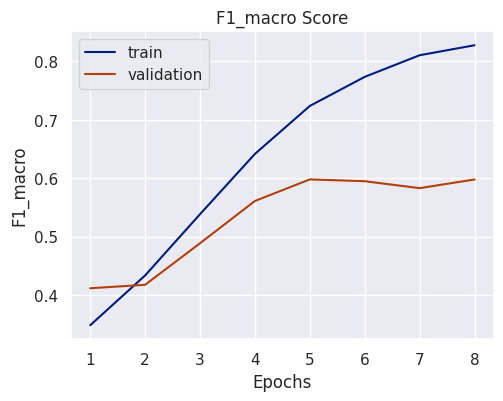

In [ ]:
learning_curve_ConvBiLSTM = plot_learning_curve(history_ConvBiLSTM)

Si può osservare come la curva di validation aumenti fino all'epoca 5 per poi iniziare ad appiattirsi ed abbassarsi. È sempre evidente la presenza di un significativo overfitting poichè la curva di training continua a salire al contrario di quella di validation.

Vengono ricavate allora l'F1-score macro e weighted sul test set tramite la funzione *evaluate*.

In [ ]:
test_f1_scores_ConvBiLSTM = ConvBiLSTM.evaluate(padded_test_sequences, y_test, verbose=0)

print(f'Test F1-score macro ConvBiLSTM: {test_f1_scores_ConvBiLSTM[1]:.4f}')
print(f'Test F1-score weighted ConvBiLSTM: {test_f1_scores_ConvBiLSTM[2]:.4f}')

Test F1-score macro ConvBiLSTM: 0.5662
Test F1-score weighted ConvBiLSTM: 0.7057


L'F1-score macro sul test set è pari al 56.62 % ed è inferiore rispetto a quello ottenuto con il BiLSTM pari al 58.71 %. Allo stesso modo l'F1-score weighted peggiora passando dal 72.77 % al 70.57 %.

Di seguito si ricavano le previsioni del modello sul train e test set e si valutano anche le altre metriche utilizzando la funzione *print_classification_reports*.

In [ ]:
y_pred_train_ConvBiLSTM = (ConvBiLSTM.predict(padded_train_sequences, verbose=0) > 0.5)
y_pred_test_ConvBiLSTM = (ConvBiLSTM.predict(padded_test_sequences, verbose=0) > 0.5)

print_classification_reports(model_name="Convolutional Bidirectional LSTM",
                             y_pred_train=y_pred_train_ConvBiLSTM,
                             y_pred_test=y_pred_test_ConvBiLSTM)

Convolutional Bidirectional LSTM - Classification Report - Train Set
               precision    recall  f1-score   support

        toxic       0.91      0.74      0.82     10599
 severe_toxic       0.66      0.75      0.70      1104
      obscene       0.89      0.86      0.87      5905
       threat       0.90      0.93      0.92       324
       insult       0.76      0.77      0.77      5490
identity_hate       0.82      0.78      0.80       963

    micro avg       0.85      0.78      0.81     24385
    macro avg       0.82      0.80      0.81     24385
 weighted avg       0.86      0.78      0.81     24385
  samples avg       0.99      0.97      0.96     24385


Convolutional Bidirectional LSTM - Classification Report - Test Set
               precision    recall  f1-score   support

        toxic       0.84      0.69      0.76      1550
 severe_toxic       0.37      0.44      0.40       158
      obscene       0.79      0.74      0.77       826
       threat       0.50      0.2

Analizzando singolarmente le metriche si osserva un peggioramento sull'F1 su ciascuna label rispetto al BiLSTM: le labels più frequenti *toxic*, *obscene* e *insult* sono passate da un F1 di 0.78, 0.79 e 0.68 ad un F1 di 0.76, 0.77 e 0.66 mentre le labels meno frequenti *severe_toxic*, *threat* e *identity_hate* sono passate da 0.43, 0.36 e 0.49 a 0.40, 0.35 e 0.46.

### Confronto tra le prestazioni dei modelli e scelta del "migliore"



Una volta creati, addestrati e valutati i diversi modelli è possibile confrontarli tutti insieme per capire quale tra questi sia il "migliore" in termini di obiettivi raggiunti. Vengono allora mandati a schermo gli F1-score macro e weighted di tali modelli.

In [ ]:
print('F1-SCORE MACRO AND WEIGHTED OF MODELS')

test_f1_macro_lr = f1_score(y_test, y_pred_test, average='macro')
test_f1_weighted_lr = f1_score(y_test, y_pred_test, average='weighted')
print(f'\nTest F1-score macro Logistic Regression: {test_f1_macro_lr:.4f}')
print(f'Test F1-score weighted Logistic Regression: {test_f1_weighted_lr:.4f}')

print(f'\nTest F1-score macro LSTM: {test_f1_scores_LSTM[1]:.4f}')
print(f'Test F1-score weighted LSTM: {test_f1_scores_LSTM[2]:.4f}')

print(f'\nTest F1-score macro BiLSTM: {test_f1_scores_BiLSTM[1]:.4f}')
print(f'Test F1-score weighted BiLSTM: {test_f1_scores_BiLSTM[2]:.4f}')

print(f'\nTest F1-score macro ConvBiLSTM: {test_f1_scores_ConvBiLSTM[1]:.4f}')
print(f'Test F1-score weighted ConvBiLSTM: {test_f1_scores_ConvBiLSTM[2]:.4f}')

F1-SCORE MACRO AND WEIGHTED OF MODELS

Test F1-score macro Logistic Regression: 0.5121
Test F1-score weighted Logistic Regression: 0.6614

Test F1-score macro LSTM: 0.5557
Test F1-score weighted LSTM: 0.6968

Test F1-score macro BiLSTM: 0.5871
Test F1-score weighted BiLSTM: 0.7277

Test F1-score macro ConvBiLSTM: 0.5662
Test F1-score weighted ConvBiLSTM: 0.7057


Si osserva, innanzitutto, come tutti e tre i modelli di deep learning sperimentati siano riusciti a migliorare le prestazioni del modello baseline di regressione logistica (F1 macro e weighted: 51 % e  66 %) come da aspettativa. Il "migliore" tra questi tre modelli può essere considerato il **Bidirectional LSTM Model** che raggiunge un **F1-score macro** del **59 %** e un **F1-score weighted** del **73 %**: miglioramento rispettivamente dell'8 e del 7 % sul modello baseline. Vengono allora mandati nuovamente a schermo i classification reports di tale modello.

In [ ]:
print_classification_reports(model_name="Bidirectional LSTM",
                             y_pred_train=y_pred_train_BiLSTM,
                             y_pred_test=y_pred_test_BiLSTM)

Bidirectional LSTM - Classification Report - Train Set
               precision    recall  f1-score   support

        toxic       0.88      0.78      0.83     10599
 severe_toxic       0.67      0.64      0.66      1104
      obscene       0.88      0.85      0.87      5905
       threat       0.84      0.97      0.90       324
       insult       0.77      0.78      0.78      5490
identity_hate       0.87      0.82      0.84       963

    micro avg       0.84      0.80      0.82     24385
    macro avg       0.82      0.81      0.81     24385
 weighted avg       0.85      0.80      0.82     24385
  samples avg       0.98      0.97      0.96     24385


Bidirectional LSTM - Classification Report - Test Set
               precision    recall  f1-score   support

        toxic       0.82      0.75      0.78      1550
 severe_toxic       0.44      0.42      0.43       158
      obscene       0.81      0.77      0.79       826
       threat       0.36      0.35      0.36        48
      

I miglioramente che si ottengono rispetto al modello baseline sono significativi sia per quanto riguarda le labels più frequenti *toxic*, *obscene* ed *insult* che le labels meno frequenti *severe_toxic*, *threat* ed *identity_hate*. Ciò nonostante le prestazioni del modello nel complesso non sono del tutto soddisfacenti essendo arrivati ad ad avere dei risultati "medi" sulle metriche pesate (precision: 75 %, recall 71 %, f1-score 73 %) ma "medio-bassi" sulle metriche macro (precision: 60 %, recall 57 %, f1-score 59 %). Infatti, resta un problema nell'utilizzo di questo modello dovuto alla presenza di un **significativo overfitting** (senza l'early stopping si sarebbe arrivati ad avere delle prestazioni davvero ottime sul training set) che non è stato possibile ridurre in maniera convincente nonostante i vari modelli e tecniche: reperire dati più numerosi e di maggiore qualità con consistente presenza maggiore delle labels meno frequenti potrebbe essere l'unica soluzione.             

Scelto il modello "migliore" è possibile anche plottare la **matrice di confusione** per ciascuna label. Essa riassume visivamente le performance del modello mostrando quanti e quali errori ha commesso.

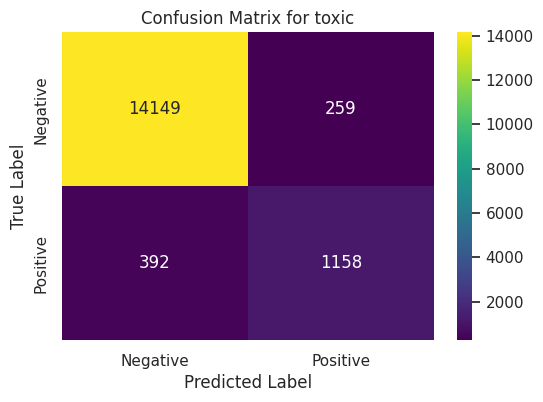

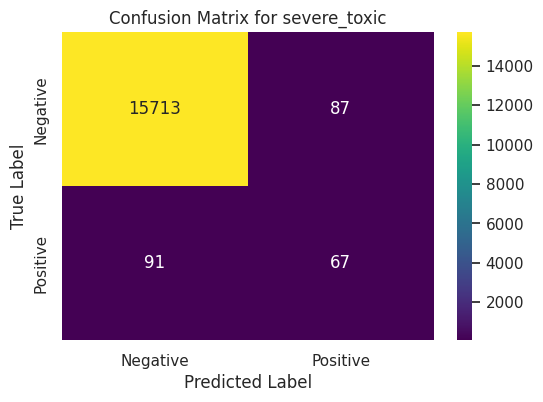

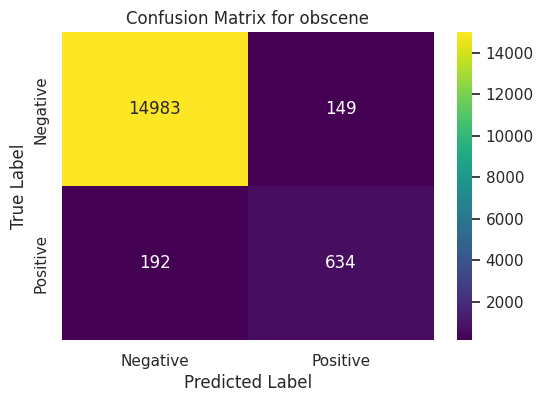

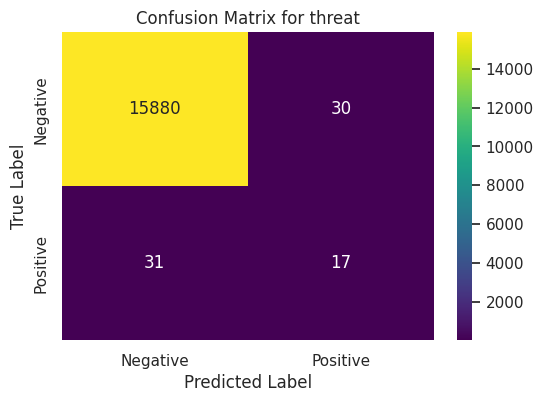

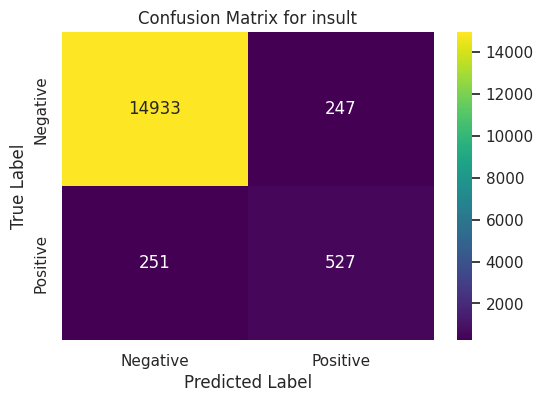

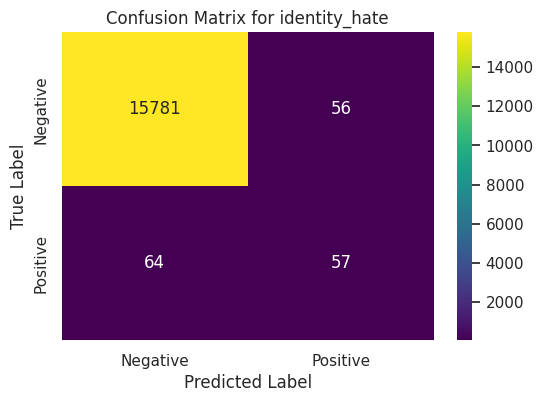

In [ ]:
def plot_confusion_matrix_for_each_label(y_true, y_pred, labels_names):

    for i, label_name in enumerate(labels_names):
        y_true_label = y_true[:, i]
        y_pred_label = y_pred[:, i]

        cm = confusion_matrix(y_true_label, y_pred_label)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
                    xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'])
        plt.title(f'Confusion Matrix for {label_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

plot_confusion_matrix_for_each_label(y_test, y_pred_test_BiLSTM, labels_names)

Con le matrici di confusione appare ancora più evidente la difficoltà del modello a classificare correttamente le labels meno frequenti.

#### Salvataggio del tokenizer e del modello

Una volta scelto il modello da utilizzare è conveniente salvare i suoi pesi tramite il metodo *save* dello stesso modello keras *BiLSTM*. Allo stesso modo viene salvato il *tokenizer* ma utilizzando la funzione *dump* della libreria *joblib*. I due file vengono salvati nei rispettivi percorsi drive *tokenizer_path* e *model_path*.

In [ ]:
url = '/content/drive/MyDrive/Colab Notebooks/07 - Deep Learning e '+\
      'Reti Neurali Artificiali/Progetto Finale/'

tokenizer_path = url + 'tokenizer.joblib'
model_path = url + 'BiLSTM.keras'

dump(tokenizer, tokenizer_path)
BiLSTM.save(model_path, include_optimizer=False)

Per permettere di scaricare direttamente su colab il tokenizer e il modello ad un generico utente viene utilizzata la funzione *download* della libreria *gdown* (i due file drive sono stati abilitati alla condivisione tramite link).

In [ ]:
tokenizer_url = 'https://drive.google.com/uc?id=1-KE2zXbFymVt2ES8-cyH-f4EgUo7lXq4'
model_url = 'https://drive.google.com/uc?id=1-JsPpniaAKa-1qYl8QEITFhzTL1VpXSm'

gdown.download(tokenizer_url, 'tokenizer.joblib', quiet=False)
gdown.download(model_url, 'BiLSTM.keras', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-KE2zXbFymVt2ES8-cyH-f4EgUo7lXq4
To: /content/tokenizer.joblib
100%|██████████| 5.83M/5.83M [00:00<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-JsPpniaAKa-1qYl8QEITFhzTL1VpXSm
To: /content/BiLSTM.keras
100%|██████████| 18.6M/18.6M [00:00<00:00, 58.4MB/s]


'BiLSTM.keras'

Una volta scaricati, i due file *tokenizer.joblib* e *BiLSTM.keras* vengono ricaricati nell'ambiente rispettivamente tramite le funzioni *load* e *load_model*. Inoltre, il modello keras deve essere ricompilato poichè in precedenza sono stati salvati solo i suoi pesi essendo in presenza di una funziona di compilazione personalizzata.

In [ ]:
tokenizer = load('tokenizer.joblib')

BiLSTM = load_model('BiLSTM.keras', compile=False)
compile_model(BiLSTM)

print(f'tokenizer: {tokenizer}')
print(f'BiLSTM: {BiLSTM}')

tokenizer: <keras.src.legacy.preprocessing.text.Tokenizer object at 0x7a36209f5ab0>
BiLSTM: <Sequential name=BiLSTM, built=True>


Grazie a questa procedura il modello può essere utilizzato senza essere costretti a riaddestrarlo ogni volta.


### Prototipo di *toxix_comments_filter* e test su esempi casuali

A questo punto si può creare il prototipo di **filtro anti-hater per social network** racchiudendo tutte le precedenti operazioni di pulizia testuale, tokenizzazione, trasformazione in sequenze "paddate" e predizione del modello in un'unica funzione: ***toxic_comments_filter***.

In [ ]:
def toxic_comments_filter(sentence):

    '''
    Filters toxic comments using a trained Bidirectional LSTM model.

    Parameters:
    - sentence (str): The input sentence to be analyzed for toxicity.

    Returns:
    - y_pred (array-like): A binary array indicating the presence of toxicity
      in the input sentence (1 for toxic, 0 for non-toxic).
    '''

    cleaned_sentence = text_cleaner(sentence)
    sequence = tokenizer.texts_to_sequences([cleaned_sentence])
    padded_sequence = pad_sequences(sequence,
                                    maxlen=77,
                                    padding='post',
                                    truncating='post')

    y_pred = (BiLSTM.predict(padded_sequence, verbose=0) > 0.5).astype(int)

    return y_pred

La funzione appena costruita viene testata su 5 esempi tossici casuali appartenenti al test set.

In [ ]:
valid_indices = [i for i in range(len(y_test)) if np.any(y_test[i] == 1)]

num_sentences = 5
random_indices = random.sample(valid_indices, min(num_sentences, len(valid_indices)))

print(f'Labels names:\n{labels_names}\n')

for index in random_indices:
    sentence = X_test[index]
    predicted_labels = toxic_comments_filter(sentence)
    true_labels = y_test[index]

    print(f'Sentence:\n{sentence}\n')
    print(f'Predicted labels: {predicted_labels}')
    print(f'True labels: {true_labels}')
    print('-'*33)

Labels names:
Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

Sentence:
max seriously give flying fuck jakezing attitude towards done done need move forget jake probably never see wikipedia spoiled otherwise clean record dealing pompous jackass need damage tell problem quite frankly understand either kept arguing long believe poor judgment really case help anything reason stepped trying stop two ripping others throat good since two kept right might confused someone else reason keep harassing displayed abuse wp civil wp npa countless occasion please u favor go way talk evidence

Predicted labels: [[1 0 1 0 0 0]]
True labels: [1 0 1 0 0 0]
---------------------------------
Sentence:
peeeeeeeeeeniiiiiiiiiiiiisssss still waiting response

Predicted labels: [[0 0 0 0 0 0]]
True labels: [1 0 0 0 0 0]
---------------------------------
Sentence:
fuck fuck fuck ffffffffuuuuuuuuuuuucccccccccccccckkkkkkkkkkkkkkkk yyyyyyyyyyyyyyyyyoooo

La funzione *toxic_comments_filter* opera correttamente restituendo per ogni frase il vettore contenente le sei previsioni (0/1) per ciascuna label.

In questo specifico caso, dato da 5 esempi casuali, il modello effettua sempre previsioni corrette ad eccezione della seconda frase. La frase in questione doveva essere classificata come *toxic* ma probabilmente la parola "peeeeeeeeeeniiiiiiiiiiiiisssss", unica nociva all'interno della frase, è passata inosservata essendo scritta in maniera molto particolare con lettere ripetute.